# Artificial Neural Network

In [39]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from common import *
import tarfile
import glob
import tensorflow as tf
from keras.backend import clear_session


In [40]:
if not os.path.exists('aclImdb'):
    if not os.path.exists('aclImdb_v1.tar.gz'):
        files = download_data()
    else:
        files = ['aclImdb_v1.tar.gz']
    
    tarfile.open(files[0]).extractall()

paths = glob.glob('aclImdb/**/pos/*.txt', recursive=True)
pos_frame = get_data(paths, 1)
paths = glob.glob('aclImdb/**/neg/*.txt', recursive=True)
neg_frame = get_data(paths, 0)

df = pd.concat([pos_frame, neg_frame])
print(f'Size of dataset: {df.size}')
df.head()

Size of dataset: 100000


,text,label
0,Tromeo and Juliet is perhaps the best Shakespe...,1
1,"The book ""The Railway Children"" is a children'...",1
2,"If you're into alternate realities, contemplat...",1
3,"If not the best movie ever made, ""Babette's Fe...",1
4,SPOILERS BELOW<br /><br />`A Dog's Life' was m...,1


In [41]:
df = df.sample(n=NUM_SAMPLES, random_state=RANDOM_SEED)
df.head()

,text,label
1247,"As a kid, this movie scared me green. As an ad...",0
10067,It is a movie which sheds the light on the beg...,0
9590,Talk about being boring!<br /><br />I got this...,0
16668,One of Disney's best films that I can enjoy wa...,1
12196,"Being a bit of a connoisseur of garbage, I hav...",1


In [42]:
countVectorizer = CountVectorizer()
embeddings = preprocess_data(df['text'], countVectorizer)

X_tr, X_ts, y_tr, y_ts= train_test_split(embeddings, df['label'], test_size=TEST_SIZE, random_state=RANDOM_SEED)

X_tr = X_tr.toarray()
X_ts = X_ts.toarray()

feature_size = X_tr.shape[1]

print(f'Train shape: {X_tr.shape}')
print(f'Test shape: {X_ts.shape}')

Train shape: (2500, 51072)
Test shape: (2500, 51072)


In [43]:
#first basic ann
from keras.models import Sequential
from keras import layers

input_dim = X_tr.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                510730    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 510,741
Trainable params: 510,741
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(
    X_tr, y_tr,
    epochs=EPOCHS,
    verbose=True,
    validation_data=(X_ts, y_ts),
    batch_size=128
)

Epoch 1/10
20/20 [==============================] - 2s 61ms/step - loss: 0.6310 - accuracy: 0.7016 - val_loss: 0.5587 - val_accuracy: 0.7916
Epoch 2/10
20/20 [==============================] - 1s 33ms/step - loss: 0.4273 - accuracy: 0.8964 - val_loss: 0.4645 - val_accuracy: 0.8468
Epoch 3/10
20/20 [==============================] - 1s 35ms/step - loss: 0.2875 - accuracy: 0.9580 - val_loss: 0.4134 - val_accuracy: 0.8568
Epoch 4/10
20/20 [==============================] - 1s 34ms/step - loss: 0.1962 - accuracy: 0.9828 - val_loss: 0.3938 - val_accuracy: 0.8512
Epoch 5/10
20/20 [==============================] - 1s 33ms/step - loss: 0.1318 - accuracy: 0.9936 - val_loss: 0.3500 - val_accuracy: 0.8688
Epoch 6/10
20/20 [==============================] - 1s 34ms/step - loss: 0.0912 - accuracy: 0.9968 - val_loss: 0.3390 - val_accuracy: 0.8700
Epoch 7/10
20/20 [==============================] - 1s 34ms/step - loss: 0.0673 - accuracy: 0.9984 - val_loss: 0.3329 - val_accuracy: 0.8672
Epoch 8/10
20

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

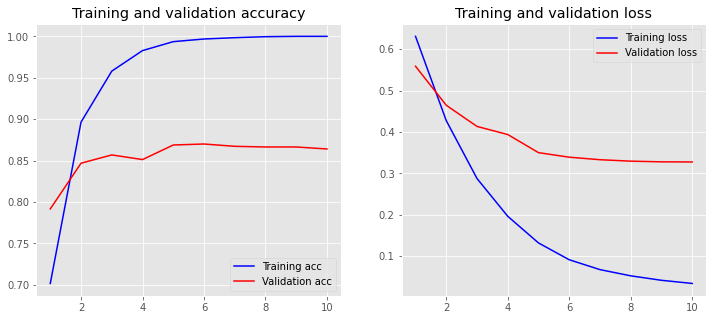

In [45]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

history.history.keys()

In [46]:
loss, accuracy = model.evaluate(X_tr, y_tr, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_ts, y_ts, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8640


# CNN

In [47]:
sentences_train, sentences_test, y_tr, y_ts= train_test_split(df['text'], df['label'], test_size=TEST_SIZE, random_state=RANDOM_SEED)
print(sentences_train)

5677     I watched part of the first part of this movie...
8687     i have had this movie, in the back of my head ...
1221     I was a huge fan of the original Robocop.<br /...
8034     Rita Hayworth as Rusty Parker is the COVER GIR...
20403    "Everything a great documentary could be"?? Ye...
                               ...                        
20659    This show had pretty good stories, but bad dia...
5543     A great combination: - Chabat's humor - Uderzo...
23070    honestly, where can I begin! This was a low bu...
1304     ***Possible spoilers***<br /><br />I've read u...
8938     Relentless like one of those loud action movie...
Name: text, Length: 2500, dtype: object


In [48]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_tr = tokenizer.texts_to_sequences(sentences_train)
X_ts = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [49]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_tr = pad_sequences(X_tr, padding='post', maxlen=maxlen)
X_ts = pad_sequences(X_ts, padding='post', maxlen=maxlen)

print(X_tr[0, :])


[  10  287  187    4    1   83  187    4   11   16    2 2923  117 1498
    4   82  586  294  151 4167   18   10   90  101   11   16    6   66
  263  141    1  979  103    2  125 1236  116  794    2    6  266  221
   18   47   23   79  166    8    9   14   70    2   48 3233  166    1
 1499    2  492    4    9  636   68  124    2   17   84   11   16   56
   22   25   52 3883   43 2924    5  115    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [50]:
from keras.layers import Embedding
embedding_dim = 50

model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.GlobalMaxPool1D())
model_cnn.add(layers.Dense(10, activation='relu'))
model_cnn.add(layers.Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           1535050   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           32128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,568,479
Trainable params: 1,568,479
Non-trainable params: 0
____________________________________________

In [51]:
history = model_cnn.fit(X_tr, y_tr, validation_data=(X_ts, y_ts), epochs=EPOCHS, batch_size=128, verbose=1)

Epoch 1/10
20/20 [==============================] - 1s 36ms/step - loss: 0.6926 - accuracy: 0.5100 - val_loss: 0.6910 - val_accuracy: 0.5804
Epoch 2/10
20/20 [==============================] - 1s 31ms/step - loss: 0.6769 - accuracy: 0.8072 - val_loss: 0.6858 - val_accuracy: 0.5932
Epoch 3/10
20/20 [==============================] - 1s 31ms/step - loss: 0.6552 - accuracy: 0.8648 - val_loss: 0.6729 - val_accuracy: 0.6852
Epoch 4/10
20/20 [==============================] - 1s 32ms/step - loss: 0.6111 - accuracy: 0.9252 - val_loss: 0.6346 - val_accuracy: 0.6388
Epoch 5/10
20/20 [==============================] - 1s 32ms/step - loss: 0.5218 - accuracy: 0.8528 - val_loss: 0.5537 - val_accuracy: 0.7728
Epoch 6/10
20/20 [==============================] - 1s 32ms/step - loss: 0.3857 - accuracy: 0.9092 - val_loss: 0.4641 - val_accuracy: 0.7936
Epoch 7/10
20/20 [==============================] - 1s 31ms/step - loss: 0.2500 - accuracy: 0.9476 - val_loss: 0.4165 - val_accuracy: 0.8064
Epoch 8/10
20

In [52]:
loss, accuracy = model_cnn.evaluate(X_tr, y_tr, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_cnn.evaluate(X_ts, y_ts, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8120


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

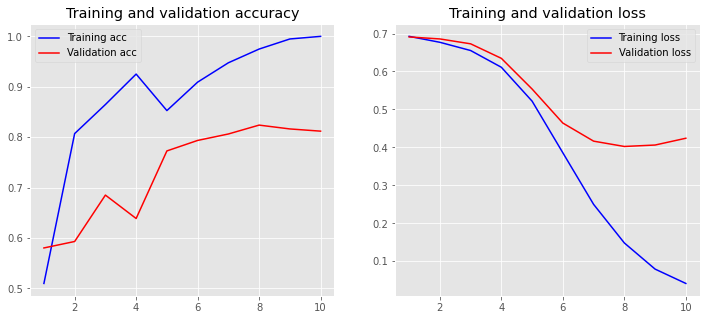

In [53]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

history.history.keys()

# BNN

In [54]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from typing import *
# from sentence_transformers import SentenceTransformer

Prior and posterior likelihoods modeled by a zero-mean, unit-variance Gaussian normal distribution and multivariate Gaussian distribution with learnable mean and variances, respectively.

In [55]:
# zero mean, unit variance multivariate normal
def prior(kernel_size, bias_size, dtype=None):
        n = kernel_size + bias_size
        prior_model = keras.Sequential(
            [
                tfp.layers.DistributionLambda(
                    lambda t: tfp.distributions.MultivariateNormalDiag(
                        loc=tf.zeros(n), scale_diag=tf.ones(n)
                    )
                )
            ]
        )
        return prior_model


# variational multivariate normal (learnable means and variances)
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n),
                dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n)
        ]
    )
    return posterior_model

Create and compile model. The code below creates a hybrid BNN with 2 8-unit deterministic layers and a 2-unit probabilistic layer. The output is a normal distribution based on the parameters learned in the posterior functions/distribution.

In [56]:
inputs = keras.Input(
    shape=(maxlen,), dtype=tf.float64
)

features = keras.layers.BatchNormalization()(inputs)
features = keras.layers.Dense(8, activation='sigmoid')(features)
features = keras.layers.Dense(8, activation='sigmoid')(features)

distribution_params = tfp.layers.DenseVariational(
    units=2,
    make_prior_fn=prior,
    make_posterior_fn=posterior,
    kl_weight=1/TRAIN_SIZE
)(features)

outputs = tfp.layers.IndependentNormal(1)(distribution_params)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()]
)

Train and evaluate the model on the training and testing data.

In [57]:
model.fit(
    X_tr,
    y_tr,
    epochs=EPOCHS,
    verbose=1,
    validation_data=tuple([X_ts, y_ts])
)

Epoch 1/10
79/79 [==============================] - 2s 10ms/step - loss: 7.0249e-04 - categorical_accuracy: 1.0000 - val_loss: 6.4733e-04 - val_categorical_accuracy: 1.0000
Epoch 2/10
79/79 [==============================] - 0s 3ms/step - loss: 6.2626e-04 - categorical_accuracy: 1.0000 - val_loss: 5.0711e-04 - val_categorical_accuracy: 1.0000
Epoch 3/10
79/79 [==============================] - 0s 3ms/step - loss: 3.9517e-04 - categorical_accuracy: 1.0000 - val_loss: 4.9082e-04 - val_categorical_accuracy: 1.0000
Epoch 4/10
79/79 [==============================] - 0s 3ms/step - loss: 4.0349e-04 - categorical_accuracy: 1.0000 - val_loss: 3.9199e-04 - val_categorical_accuracy: 1.0000
Epoch 5/10
79/79 [==============================] - 0s 4ms/step - loss: 3.1676e-04 - categorical_accuracy: 1.0000 - val_loss: 3.2015e-04 - val_categorical_accuracy: 1.0000
Epoch 6/10
79/79 [==============================] - 0s 4ms/step - loss: 3.4796e-04 - categorical_accuracy: 1.0000 - val_loss: 2.5098e-04 - 

In [58]:
clear_session()

loss, accuracy = model.evaluate(X_tr, y_tr)
print(f'Training accuracy: {accuracy}')

loss, accuracy = model.evaluate(X_ts, y_ts)
print(f'Testing accuracy: {accuracy}')

79/79 [==============================] - 0s 2ms/step - loss: 7.4237e-05 - categorical_accuracy: 1.0000
Training accuracy: 1.0
79/79 [==============================] - 0s 2ms/step - loss: 8.2923e-05 - categorical_accuracy: 1.0000
Testing accuracy: 1.0


In [59]:
PREDICTION_ITERATIONS = 100

results = {
    'Mean': [],
    'Standard Deviation': [],
    'Label': [],
}

# predict on test samples
for i, sample in enumerate(X_ts[0:50, :]):
    sample = sample.reshape(1, sample.shape[0])
    predictions = []

    for _ in range(PREDICTION_ITERATIONS):
        predictions.append(model.predict(sample))

    predictions = np.concatenate(predictions, axis=1)

    results['Mean'].append(np.average(predictions, axis=1)[0])
    results['Standard Deviation'].append(np.std(predictions, axis=1)[0])
    results['Label'].append(y_ts.array[i])

results = pd.DataFrame(data=results)
results.head()

,Mean,Standard Deviation,Label
0,-0.050963,1.989683,1
1,0.038671,1.768465,0
2,-0.001949,2.034737,0
3,0.772911,2.157537,1
4,0.397834,2.087585,0
